In [1]:
#!pip install nltk
#!pip install wordcloud
!pip install tensorflow

In [2]:
#text classification
#predict spam or not spam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
import nltk
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load dataset
df=pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,not spam,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,not spam,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,not spam,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,not spam,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Siraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Siraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Siraj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Siraj\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
#check null
df.isnull().sum()

category         0
Message          0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
#remove  unwanted column
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
#check rows and columns
df.shape

(5572, 2)

In [8]:
df.head()

,category,Message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


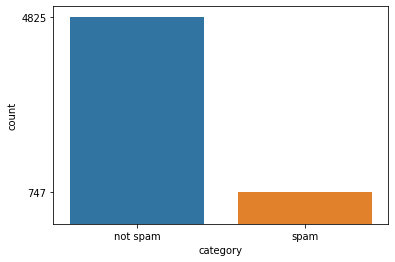

In [9]:
#visualize category
f=df['category'].value_counts()
import seaborn as sns
sns.countplot(data=df,x='category')
plt.yticks(f)
plt.show()

In [10]:
#use wordcloud
from wordcloud import WordCloud,STOPWORDS

In [11]:
wc=WordCloud(width=500,height=500,background_color='black',min_font_size=10,stopwords=STOPWORDS)

#generate
wc.generate(''.join(df[df['category']=='spam']['Message']))


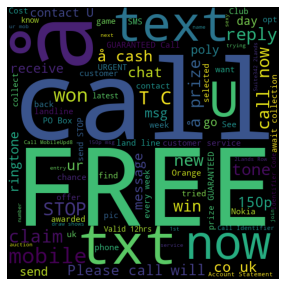

In [12]:
#show spam wordcloud image
plt.figure(figsize=(5,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [13]:
#generate not spam
wc=WordCloud(width=500,height=500,background_color='white',min_font_size=10,stopwords=STOPWORDS)

In [14]:
#generate
wc.generate(''.join(df[df['category']=='not spam']['Message']))

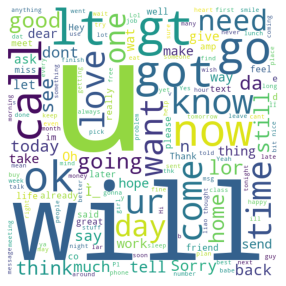

In [15]:
#show not spam wordcloud image
plt.figure(figsize=(5,5))
plt.imshow(wc)
plt.axis('off')
plt.show()


In [16]:
#perform preprocessing on txt
#create function
def clean_text(text):
    #convert in lower case
    text=text.lower()
    #print(text)
    
    #2nd step,apply tokenizer
    tokens=word_tokenize(text)
    #print('tokens')
    
    #use isalpha()  to print alphabates  and remove no.s and special char.
    word_tokens=[t for t in tokens if t.isalpha()]
    #print(word_tokens)
    
    #create list for stopwords to remove is,am,a...
    stop=stopwords.words('english')
    clean_tokens=[t for t in word_tokens if t  not in stop]
    #print(clean_tokens)
    
    #create the object of WordNetLemmatizer class
    lemma=WordNetLemmatizer()
    lemma_token=[lemma.lemmatize(t) for t in clean_tokens]
    return ' '.join(lemma_token)

In [17]:
#call function 
#clean_text('Meena wolf wolves feet study studying studied I am 123 to Pandey@gmail.com')

In [18]:
#apply clean_text function on column  of message
df['Message']=df['Message'].apply(clean_text)


In [19]:
#message after removing numbers,stopwords and special characters
df['Message']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts may...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    time tried contact u pound prize claim easy ca...
5568                            b going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [20]:
df.head()


,category,Message
0,not spam,go jurong point crazy available bugis n great ...
1,not spam,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts may...
3,not spam,u dun say early hor u c already say
4,not spam,nah think go usf life around though


In [21]:
#select input and output
X=df['Message']
Y=df['category']

In [22]:
#apply label encoder on category
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)
Y

array([0, 0, 1, ..., 0, 0, 0])

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [24]:
X_train.shape,X_test.shape

((3900,), (1672,))

In [25]:

#Now once we have the clean text in hand ,the next thing that we would 
#like to do is converts the text into number/vector

#First , we are trying the first technique : countvectorizer() : 
#its converts any text to number

In [26]:
#create object of CountVectorizer class
cv=CountVectorizer()       #Here not passing stopwords='english' parameter why?
#because its already taking care of all the stopwords means 
#already remove all stopwords from msg

In [27]:

#apply fit_transform on X train and transform on X test
X_train_cv=cv.fit_transform(X_train)
X_test_cv=cv.transform(X_test)

In [28]:
X_train_cv

<3900x5518 sparse matrix of type '<class 'numpy.int64'>'
	with 29662 stored elements in Compressed Sparse Row format>

In [29]:
#change in array
X_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
X_test_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
#see columns name
cv.get_feature_names()

#inbuilt method of count vectorization

['aah',
 'aaooooright',
 'aathi',
 'ab',
 'abbey',
 'abeg',
 'abel',
 'abi',
 'ability',
 'abiola',
 'abj',
 'able',
 'abnormally',
 'aboutas',
 'abroad',
 'absolutely',
 'absolutly',
 'abstract',
 'abt',
 'abta',
 'aburo',
 'abuser',
 'ac',
 'academic',
 'acc',
 'accent',
 'accenture',
 'accept',
 'access',
 'accessible',
 'accidant',
 'accident',
 'accidentally',
 'accommodation',
 'accommodationvouchers',
 'accomodate',
 'accomodations',
 'accordin',
 'accordingly',
 'account',
 'accounting',
 'accumulation',
 'ache',
 'acid',
 'acnt',
 'aco',
 'across',
 'acted',
 'actin',
 'action',
 'activate',
 'active',
 'activity',
 'actor',
 'actual',
 'actually',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'added',
 'addicted',
 'addie',
 'adding',
 'address',
 'adi',
 'adjustable',
 'admin',
 'administrator',
 'admirer',
 'admission',
 'adore',
 'adoring',
 'adress',
 'adsense',
 'adult',
 'advance',
 'adventure',
 'advice',
 'advise',
 'advisor',
 'afew',
 'affair',
 'affection',
 'affectionate'

In [32]:
#train the data with classsification
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [33]:
#TRAIN THE model
dt.fit(X_train_cv,Y_train)

DecisionTreeClassifier()

In [34]:
#test model
Y_pred=dt.predict(X_test_cv)

In [35]:
#print classification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1454
           1       0.88      0.82      0.85       218

    accuracy                           0.96      1672
   macro avg       0.93      0.90      0.91      1672
weighted avg       0.96      0.96      0.96      1672

[[1429   25]
 [  39  179]]


In [36]:
#to show important features
dt.feature_importances_[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [37]:
#Secondly , we are trying the second technique : - TFIDF vectorizer : 
#to converts text into number(vector)
#call TfidfVectorizer class  : it is already called above
#create object of TfidfVectorizer class
tf=TfidfVectorizer()


In [38]:
X_train_tf=tf.fit_transform(X_train)
X_test_tf=tf.transform(X_test)

In [39]:
pd.DataFrame(X_train_tf.toarray(),columns=tf.get_feature_names()).head()

,aah,aaooooright,aathi,ab,abbey,abeg,abel,abi,ability,abiola,...,zoe,zogtorius,zoom,zouk,zyada,åð,åòharry,åòit,åômorrow,ìï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
#train the data with classsification
dt=DecisionTreeClassifier()

In [41]:
#TRAIN THE model
dt.fit(X_train_cv,Y_train)

DecisionTreeClassifier()

In [42]:
#test model
Y_pred=dt.predict(X_test_cv)

In [43]:
#print classification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1454
           1       0.87      0.82      0.85       218

    accuracy                           0.96      1672
   macro avg       0.92      0.90      0.91      1672
weighted avg       0.96      0.96      0.96      1672

[[1428   26]
 [  39  179]]


In [44]:

#!pip install tensorflow

In [45]:
import tensorflow as tf

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [47]:
#change in array
X_train_cv=X_train_cv.toarray()
X_test_cv=X_test_cv.toarray()

In [48]:
X_train_cv.shape

(3900, 5518)

In [49]:
X_test_cv.shape

(1672, 5518)

In [50]:
model=Sequential()
model.add(Dense(units=5518,activation='relu',input_shape=(X_train_cv.shape[1],)))  #1st hidden layer
model.add(Dense(units=5518,activation='relu'))    #2nd hidden
model.add(Dense(units=1,activation='sigmoid'))  #output layer 

In [51]:
#compile
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
# Create Early stopping means create a call back
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [53]:
model.fit(X_train_cv,Y_train,batch_size=50,epochs=2000,validation_split=0.2,callbacks=callback)

Epoch 1/2000
63/63 [==============================] - 91s 1s/step - loss: 0.1840 - accuracy: 0.9468 - val_loss: 0.0705 - val_accuracy: 0.9859
Epoch 2/2000
63/63 [==============================] - 77s 1s/step - loss: 0.0082 - accuracy: 0.9971 - val_loss: 0.0742 - val_accuracy: 0.9859
Epoch 3/2000
63/63 [==============================] - 77s 1s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0998 - val_accuracy: 0.9846
Epoch 4/2000
63/63 [==============================] - 76s 1s/step - loss: 2.4764e-04 - accuracy: 1.0000 - val_loss: 0.1014 - val_accuracy: 0.9846
Epoch 5/2000
63/63 [==============================] - 76s 1s/step - loss: 1.2518e-04 - accuracy: 1.0000 - val_loss: 0.1067 - val_accuracy: 0.9846
Epoch 6/2000
63/63 [==============================] - 79s 1s/step - loss: 7.5294e-05 - accuracy: 1.0000 - val_loss: 0.1125 - val_accuracy: 0.9846
Epoch 7/2000
63/63 [==============================] - 85s 1s/step - loss: 4.8920e-05 - accuracy: 1.0000 - val_loss: 0.1167 - val_accurac

In [54]:
Y_pred=model.predict(X_test_cv).round(2)


53/53 [==============================] - 14s 246ms/step


In [55]:
Y_pred

array([[0.  ],
       [0.  ],
       [0.  ],
       ...,
       [0.99],
       [0.  ],
       [0.  ]], dtype=float32)

In [56]:
Y_pred=np.where(Y_pred>=0.5,1,0)
Y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [57]:
#print classification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1454
           1       0.96      0.84      0.90       218

    accuracy                           0.97      1672
   macro avg       0.97      0.92      0.94      1672
weighted avg       0.97      0.97      0.97      1672

[[1447    7]
 [  35  183]]


In [58]:
#apply tfidf
#change in array
X_train_tf=X_train_tf.toarray()
X_test_tf=X_test_tf.toarray()

In [59]:
X_train_tf.shape

(3900, 5518)

In [60]:
X_test_tf.shape

(1672, 5518)

In [61]:
model=Sequential()
model.add(Dense(units=5518,activation='relu',input_shape=(X_train_tf.shape[1],)))  #1st hidden layer
model.add(Dense(units=5518,activation='relu'))    #2nd hidden
model.add(Dense(units=1,activation='sigmoid'))  #output layer 


In [62]:
#compile
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [63]:
model.fit(X_train_tf,Y_train,batch_size=50,epochs=20)

Epoch 1/20
78/78 [==============================] - 109s 1s/step - loss: 0.1834 - accuracy: 0.9323
Epoch 2/20
78/78 [==============================] - 88s 1s/step - loss: 0.0178 - accuracy: 0.9944
Epoch 3/20
78/78 [==============================] - 88s 1s/step - loss: 0.0022 - accuracy: 0.9995
Epoch 4/20
78/78 [==============================] - 88s 1s/step - loss: 5.4319e-04 - accuracy: 1.0000
Epoch 5/20
78/78 [==============================] - 88s 1s/step - loss: 1.2721e-04 - accuracy: 1.0000
Epoch 6/20
78/78 [==============================] - 88s 1s/step - loss: 6.5786e-05 - accuracy: 1.0000
Epoch 7/20
78/78 [==============================] - 88s 1s/step - loss: 3.9942e-05 - accuracy: 1.0000
Epoch 8/20
78/78 [==============================] - 89s 1s/step - loss: 2.6739e-05 - accuracy: 1.0000
Epoch 9/20
78/78 [==============================] - 88s 1s/step - loss: 1.9065e-05 - accuracy: 1.0000
Epoch 10/20
78/78 [==============================] - 88s 1s/step - loss: 1.4075e-05 - accurac

In [64]:
#test with 30%data
Y_pred=model.predict(X_test_tf).round(2)
Y_pred

53/53 [==============================] - 24s 282ms/step


array([[0.  ],
       [0.  ],
       [0.  ],
       ...,
       [0.35],
       [0.  ],
       [0.  ]], dtype=float32)

In [65]:
Y_pred=np.where(Y_pred>=0.5,1,0)
Y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [66]:
#print classification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1454
           1       0.98      0.85      0.91       218

    accuracy                           0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672

[[1450    4]
 [  33  185]]
